# アミノ酸配列のグラフ表示画像のVision Transformerによるタンパク質ファミリー分類（5分割交差検証）
- グラデーション適用
- クラスごとに分ける `StratifiedKFold` を採用
- ベースモデル：`google/vit-base-patch16-224-in21k`
- ハイパーパラメータ
    - バッチサイズ：$8$
    - エポック数：$20$
    - 学習率：$5 \times 10^{-5}$

## 1. ライブラリのインポート

In [1]:
from torch.utils.data import Dataset, Subset
from PIL import Image
import os
import pandas as pd
import numpy as np

from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from transformers import ViTImageProcessorFast, ViTForImageClassification, TrainingArguments, Trainer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import evaluate

label2id = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4}
id2label = {v: k for k, v in label2id.items()}

MODEL_NAME = "google/vit-base-patch16-224-in21k"
BATCH_SIZE = 8
EPOCHS = 20
LR = 5e-5
# WEIGHT_DECAY = 1e-4

## 1. 画像とラベルの対応を取る `Dataset` を作成

In [2]:
class GPCRImageDataset(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):
        self.data = pd.read_csv(csv_path, header=None, names=["num", "label", "accession"])
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.img_dir, f"{row['num']}.png")
        image = Image.open(img_path).convert("RGB")
        label = label2id[row["label"]]

        if self.transform:
            image = self.transform(image)
        return {"pixel_values": image, "label": label}

## 2. 画像前処理（ViT用）

In [3]:
processor = ViTImageProcessorFast.from_pretrained(MODEL_NAME)
transform = Compose([
    Resize((224, 224)),
    ToTensor(),
    Normalize(mean=processor.image_mean, std=processor.image_std)
])

## 3. `Trainer` を使って学習

In [4]:
accuracy = evaluate.load("accuracy")
dataset = GPCRImageDataset("../gpcr_labels.csv", "../graphs/gradation", transform=transform)

# StratifiedKFoldはラベル情報を使う
labels = dataset.data["label"].values
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

[Fold 1 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_16626/126239285.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.398500,0.180660,0.955959,0.560313,0.538055,0.548398
2,0.148200,0.137460,0.968264,0.772614,0.604781,0.642760
3,0.106600,0.184403,0.951425,0.717208,0.739763,0.725131
4,0.068000,0.162430,0.966321,0.736273,0.747291,0.737633
5,0.057500,0.152649,0.972150,0.784290,0.760381,0.771403
6,0.041200,0.154767,0.970855,0.776880,0.753977,0.764531
7,0.018700,0.188364,0.966321,0.700202,0.756722,0.721600
8,0.021300,0.166321,0.969560,0.856368,0.890905,0.866360
9,0.033200,0.156697,0.971503,0.774873,0.758515,0.766204
10,0.009400,0.198583,0.967617,0.786290,0.747361,0.764581


Accuracy: 0.9715 | Precision: 0.7790 | Recall: 0.7602 | F1: 0.7690
              precision    recall  f1-score      support
A              0.978585  0.990575  0.984543  1061.000000
B              0.962963  0.857143  0.906977    91.000000
C              0.953247  0.953247  0.953247   385.000000
D              0.000000  0.000000  0.000000     3.000000
E              1.000000  1.000000  1.000000     4.000000
accuracy       0.971503  0.971503  0.971503     0.971503
macro avg      0.778959  0.760193  0.768953  1544.000000
weighted avg   0.969500  0.971503  0.970295  1544.000000


/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

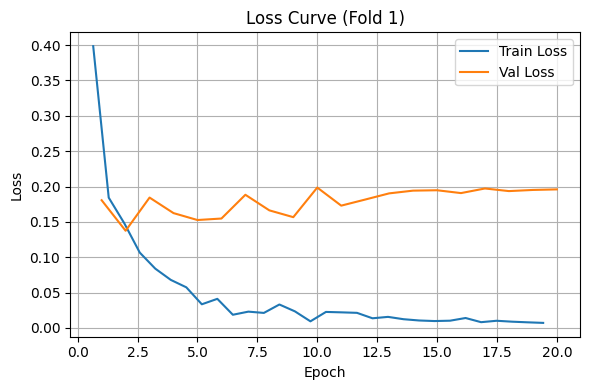

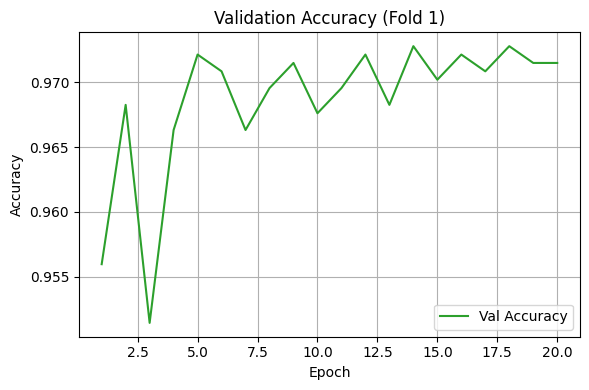

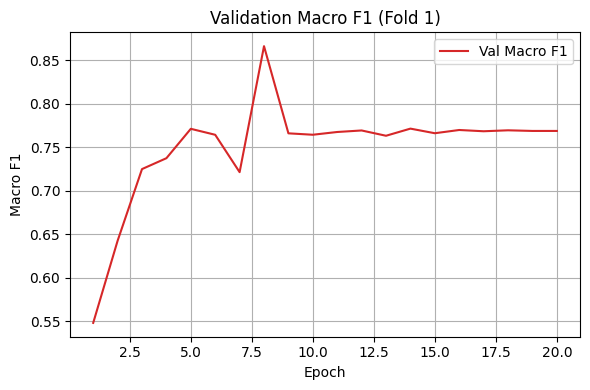

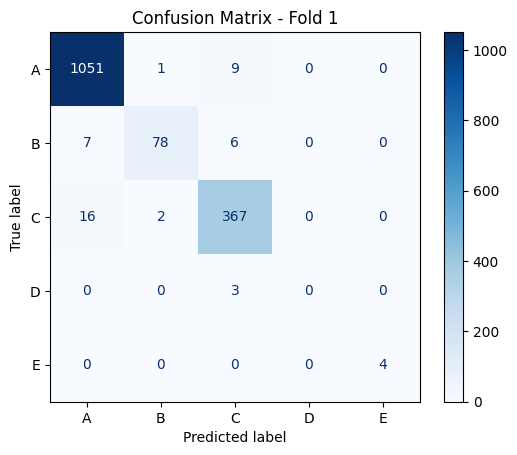

[Fold 2 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_16626/126239285.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.379400,0.185884,0.940376,0.529120,0.522783,0.525824
2,0.132500,0.160580,0.962411,0.770137,0.616225,0.659088
3,0.099800,0.172972,0.955930,0.763962,0.667901,0.707142
4,0.062900,0.170867,0.964355,0.766550,0.685962,0.719281
5,0.048700,0.168835,0.968892,0.776843,0.751011,0.762656
6,0.022200,0.170805,0.960467,0.624173,0.750868,0.658963
7,0.042600,0.145961,0.969540,0.762433,0.763016,0.762656
8,0.028900,0.150836,0.967596,0.821935,0.830689,0.826127
9,0.032300,0.188363,0.969540,0.880060,0.813554,0.840939
10,0.016800,0.192736,0.968244,0.870185,0.819552,0.839959


Accuracy: 0.9689 | Precision: 0.8574 | Recall: 0.8809 | F1: 0.8641
              precision    recall  f1-score      support
A              0.982193  0.987747  0.984962  1061.000000
B              0.946667  0.788889  0.860606    90.000000
C              0.941624  0.961140  0.951282   386.000000
D              0.666667  0.666667  0.666667     3.000000
E              0.750000  1.000000  0.857143     3.000000
accuracy       0.968892  0.968892  0.968892     0.968892
macro avg      0.857430  0.880889  0.864132  1543.000000
weighted avg   0.968907  0.968892  0.968416  1543.000000


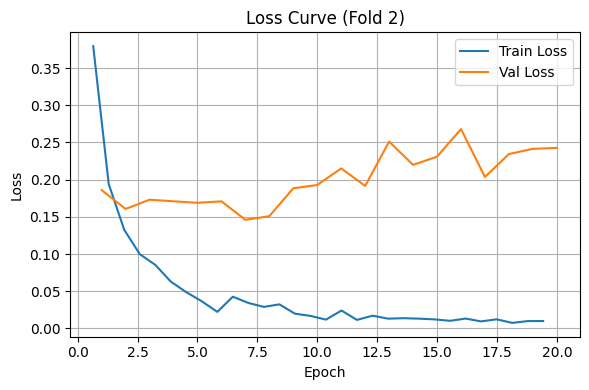

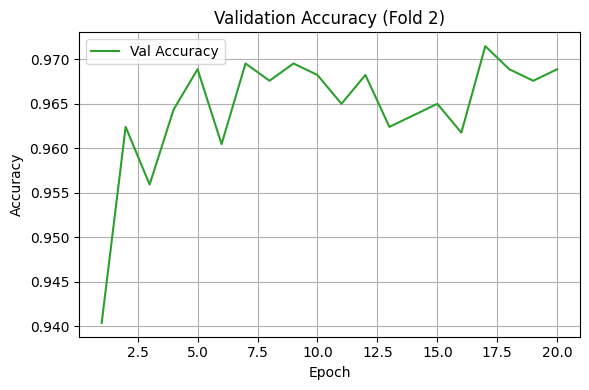

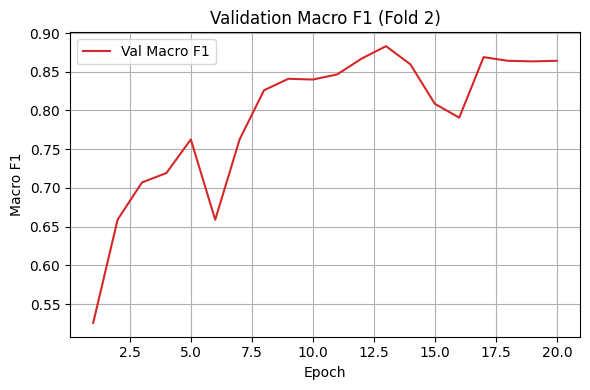

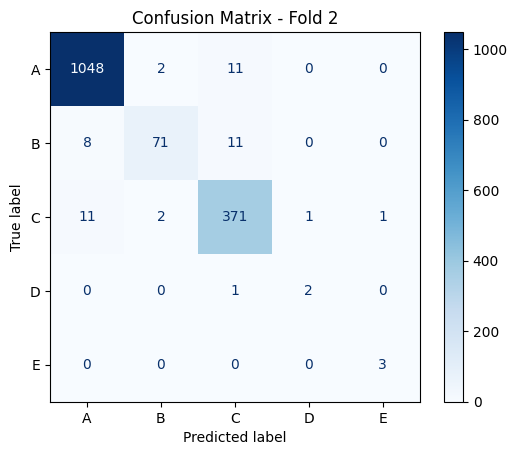

[Fold 3 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_16626/126239285.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.375700,0.237576,0.927414,0.503904,0.549102,0.520519
2,0.146000,0.142475,0.966948,0.762497,0.641650,0.668578
3,0.099500,0.183422,0.956578,0.750216,0.700858,0.718008
4,0.058500,0.192835,0.961763,0.757609,0.767166,0.762107
5,0.059900,0.196287,0.960467,0.774691,0.687829,0.723157
6,0.027500,0.223338,0.959819,0.773951,0.693436,0.726769
7,0.037900,0.206207,0.966948,0.778431,0.638323,0.674876
8,0.024500,0.211396,0.965651,0.826854,0.837050,0.831811
9,0.010300,0.214033,0.967596,0.767004,0.702289,0.727942
10,0.027000,0.241224,0.958522,0.752995,0.765564,0.758722


Accuracy: 0.9682 | Precision: 0.7734 | Recall: 0.7673 | F1: 0.7703
              precision    recall  f1-score      support
A              0.978383  0.982075  0.980226  1060.000000
B              0.942529  0.901099  0.921348    91.000000
C              0.946015  0.953368  0.949677   386.000000
D              0.000000  0.000000  0.000000     3.000000
E              1.000000  1.000000  1.000000     3.000000
accuracy       0.968244  0.968244  0.968244     0.968244
macro avg      0.773386  0.767308  0.770250  1543.000000
weighted avg   0.966311  0.968244  0.967244  1543.000000


/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

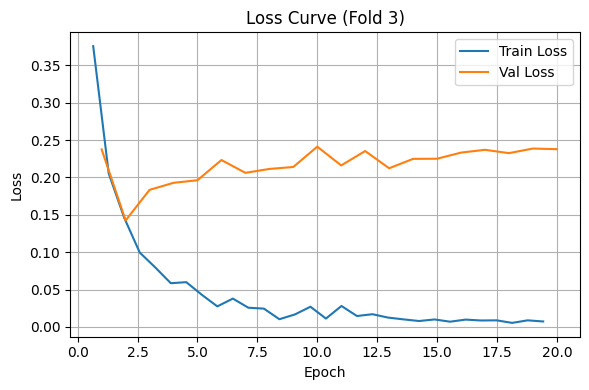

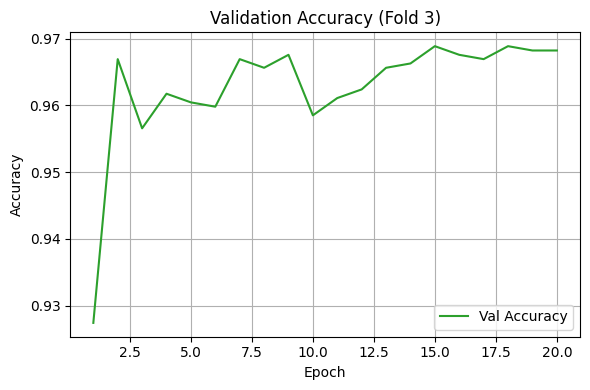

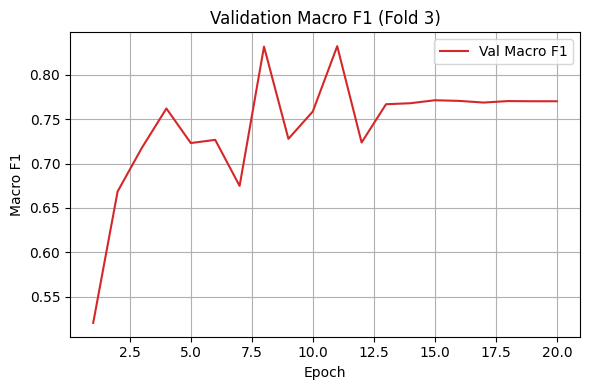

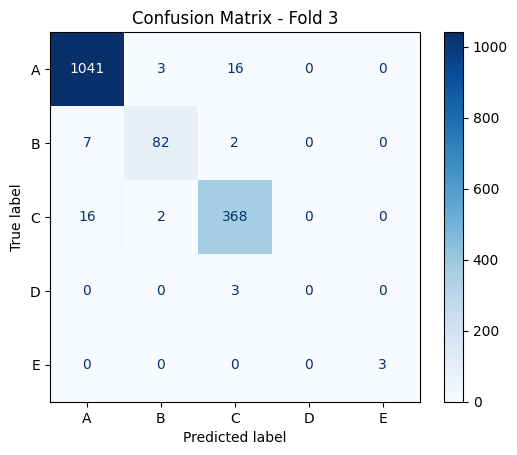

[Fold 4 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_16626/126239285.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.390300,0.191922,0.948801,0.540709,0.542188,0.541435
2,0.149600,0.217318,0.946857,0.750168,0.730292,0.739304
3,0.096000,0.155182,0.962411,0.699609,0.748722,0.717087
4,0.059500,0.219478,0.954634,0.675768,0.698391,0.685195
5,0.060500,0.172671,0.963059,0.752225,0.757936,0.754996
6,0.036900,0.174668,0.964355,0.717983,0.756304,0.734907
7,0.023700,0.189343,0.965651,0.765521,0.753619,0.759039
8,0.028800,0.227725,0.961763,0.759888,0.751796,0.755151
9,0.026000,0.206837,0.965003,0.759429,0.759490,0.759459
10,0.018000,0.209408,0.964355,0.764876,0.747214,0.755136


Accuracy: 0.9657 | Precision: 0.7674 | Recall: 0.7489 | F1: 0.7573
              precision    recall  f1-score      support
A              0.981185  0.983962  0.982572  1060.000000
B              0.924051  0.802198  0.858824    91.000000
C              0.931990  0.958549  0.945083   386.000000
D              0.000000  0.000000  0.000000     2.000000
E              1.000000  1.000000  1.000000     4.000000
accuracy       0.965651  0.965651  0.965651     0.965651
macro avg      0.767445  0.748942  0.757296  1543.000000
weighted avg   0.964286  0.965651  0.964667  1543.000000


/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

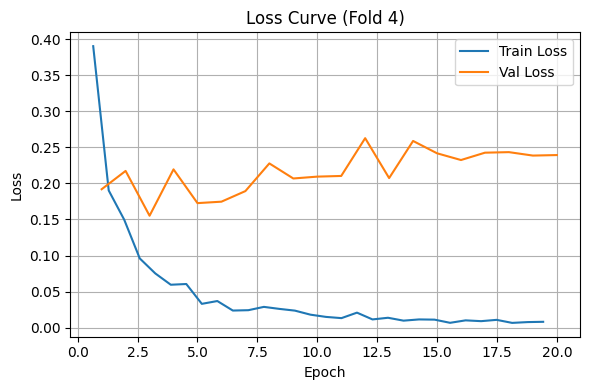

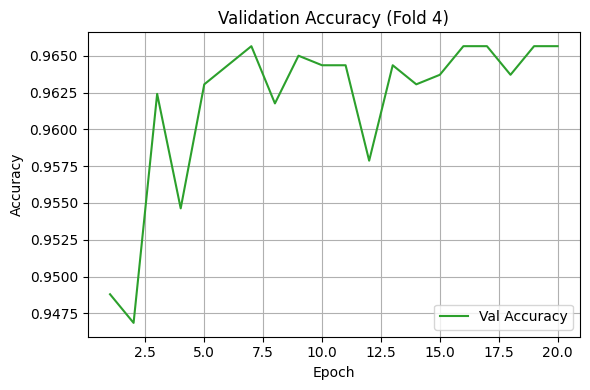

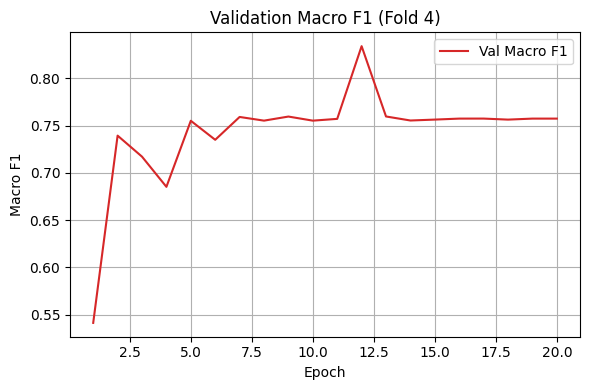

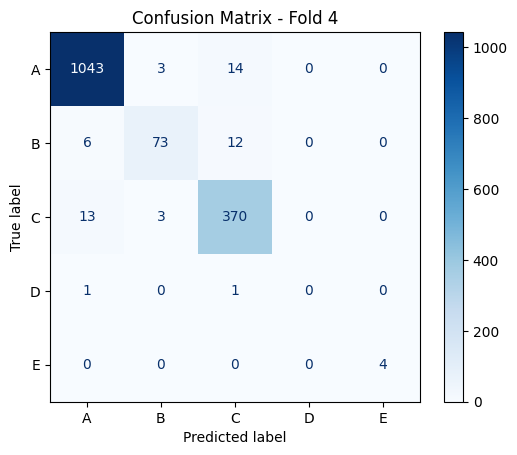

[Fold 5 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_16626/126239285.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.379500,0.205156,0.945561,0.571114,0.513808,0.536455
2,0.128300,0.135166,0.961115,0.558960,0.552362,0.554924
3,0.087800,0.174054,0.959819,0.771105,0.678000,0.716182
4,0.056300,0.141596,0.968892,0.777637,0.642523,0.690398
5,0.049800,0.226021,0.957874,0.769178,0.642378,0.687168
6,0.034000,0.172300,0.965003,0.836989,0.847938,0.838388
7,0.033100,0.196130,0.962411,0.963400,0.841091,0.883847
8,0.030100,0.252068,0.961115,0.873949,0.844500,0.858075
9,0.016800,0.170577,0.970188,0.841667,0.859461,0.846848
10,0.022900,0.178254,0.964355,0.854492,0.865140,0.859574


Accuracy: 0.9702 | Precision: 0.8639 | Recall: 0.8621 | F1: 0.8630
              precision    recall  f1-score      support
A              0.983035  0.983962  0.983498  1060.000000
B              0.877778  0.868132  0.872928    91.000000
C              0.958549  0.958549  0.958549   386.000000
D              0.500000  0.500000  0.500000     2.000000
E              1.000000  1.000000  1.000000     4.000000
accuracy       0.970188  0.970188  0.970188     0.970188
macro avg      0.863872  0.862129  0.862995  1543.000000
weighted avg   0.970120  0.970188  0.970152  1543.000000


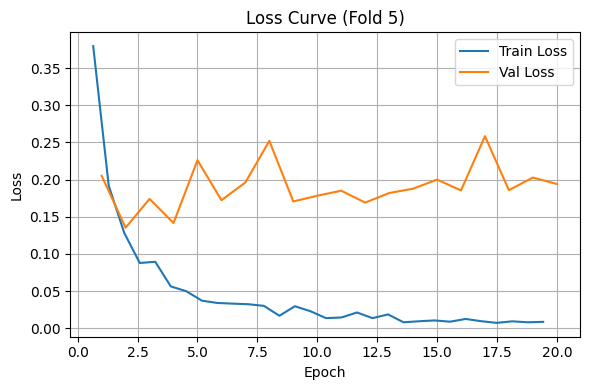

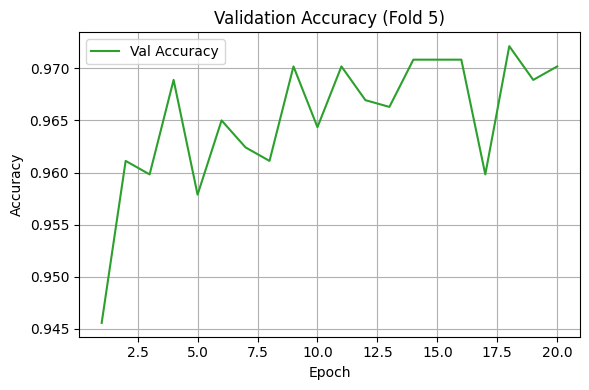

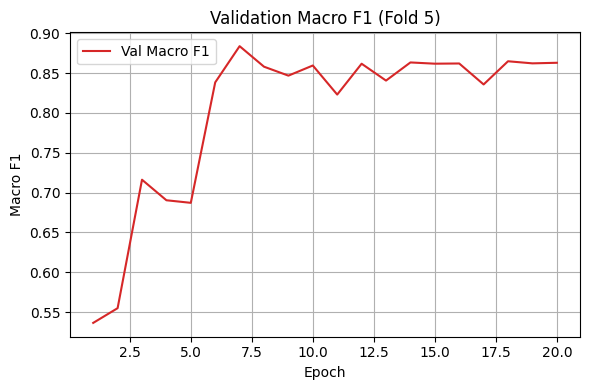

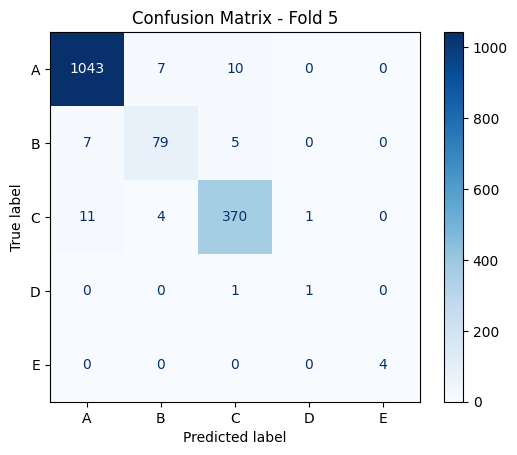

In [5]:
all_accs, all_pres, all_recs, all_f1s = [], [], [], []
all_class_f1s, all_conf_matrices = [], []
all_val_losses, all_val_accs, all_val_f1s = [], [], []

for fold, (train_idx, val_idx) in enumerate(kfold.split(np.zeros(len(labels)), labels)):
    print(f"\033[34m[Fold {fold+1} / 5]\033[0m")

    # Subset 作成
    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)

    # ======================
    # 4. モデル初期化
    # ======================
    model = ViTForImageClassification.from_pretrained(
        MODEL_NAME,
        num_labels=5,
        id2label=id2label,
        label2id=label2id
    )

    training_args = TrainingArguments(
        output_dir=f"../models/amino-classification-transformer-vit-google-stratified-kfold/batch-{BATCH_SIZE}-epoch-{EPOCHS}-lr-{LR}/{fold+1}",
        per_device_train_batch_size=BATCH_SIZE,
        per_device_eval_batch_size=BATCH_SIZE,
        eval_strategy="epoch",
        save_strategy="no",
        num_train_epochs=EPOCHS,
        logging_dir="./logs",
        report_to="none",
        learning_rate=LR,
        load_best_model_at_end=False
    )

    # ======================
    # 5. 評価指標
    # ======================
    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        preds = np.argmax(logits, axis=-1)
        acc = accuracy.compute(predictions=preds, references=labels)["accuracy"]
        f1 = f1_score(labels, preds, average="macro")
        pre = precision_score(labels, preds, average="macro", zero_division=0)
        rec = recall_score(labels, preds, average="macro", zero_division=0)
        return {"accuracy": acc, "precision": pre, "recall": rec, "f1": f1}

    # ======================
    # 6. Trainer実行
    # ======================
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=processor,
        compute_metrics=compute_metrics
    )

    trainer.train()

    # ==== ログから学習曲線抽出 ====
    log_history = pd.DataFrame(trainer.state.log_history)
    log_history = log_history.dropna(subset=["epoch"])
    train_loss = log_history[log_history["loss"].notna()][["epoch", "loss"]]
    eval_loss = log_history[log_history["eval_loss"].notna()][["epoch", "eval_loss", "eval_accuracy", "eval_f1"]]

    all_val_losses.append(eval_loss["eval_loss"].values)
    all_val_accs.append(eval_loss["eval_accuracy"].values)
    all_val_f1s.append(eval_loss["eval_f1"].values)

    # ======================
    # 7. 推論と評価
    # ======================
    preds = trainer.predict(val_dataset)
    y_true = preds.label_ids
    y_pred = np.argmax(preds.predictions, axis=1)

    acc = accuracy.compute(predictions=y_pred, references=y_true)["accuracy"]
    pre = precision_score(y_true, y_pred, average="macro", zero_division=0)
    rec = recall_score(y_true, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="macro")
    cm = confusion_matrix(y_true, y_pred, labels=list(label2id.values()))

    report = classification_report(y_true, y_pred, target_names=list(label2id.keys()), output_dict=True)
    class_f1 = [report[c]["f1-score"] for c in list(label2id.keys())]

    # ==== 保存 ====
    all_accs.append(acc)
    all_pres.append(pre)
    all_recs.append(rec)
    all_f1s.append(f1)
    all_class_f1s.append(class_f1)
    all_conf_matrices.append(cm)

    # ==== 表示 ====
    print(f"\033[91mAccuracy: {acc:.4f}\033[0m | "
          f"\033[92mPrecision: {pre:.4f}\033[0m | "
          f"\033[93mRecall: {rec:.4f}\033[0m | "
          f"\033[94mF1: {f1:.4f}\033[0m")
    print(pd.DataFrame(report).T)

    # ==== foldごとの学習曲線を可視化 ====
    # --- Loss 曲線 ---
    plt.figure(figsize=(6, 4))
    plt.plot(train_loss["epoch"], train_loss["loss"], label="Train Loss", color="C0")
    plt.plot(eval_loss["epoch"], eval_loss["eval_loss"], label="Val Loss", color="C1")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Loss Curve (Fold {fold+1})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Accuracy 曲線 ---
    plt.figure(figsize=(6, 4))
    plt.plot(eval_loss["epoch"], eval_loss["eval_accuracy"], label="Val Accuracy", color="C2")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"Validation Accuracy (Fold {fold+1})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Macro F1 曲線 ---
    plt.figure(figsize=(6, 4))
    plt.plot(eval_loss["epoch"], eval_loss["eval_f1"], label="Val Macro F1", color="C3")
    plt.xlabel("Epoch")
    plt.ylabel("Macro F1")
    plt.title(f"Validation Macro F1 (Fold {fold+1})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 混同行列を可視化
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label2id.keys()))
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - Fold {fold+1}")
    plt.show()

## 4. 平均可視化

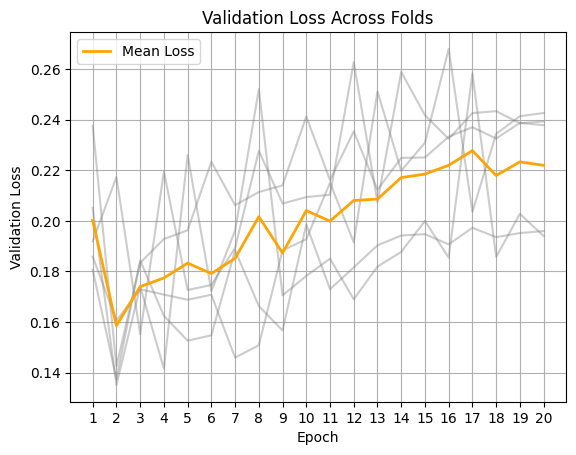

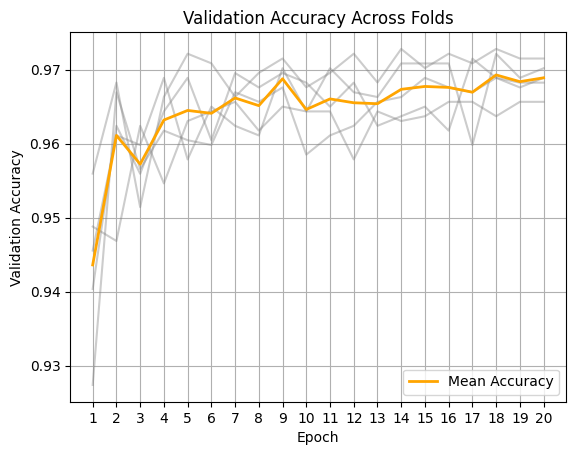

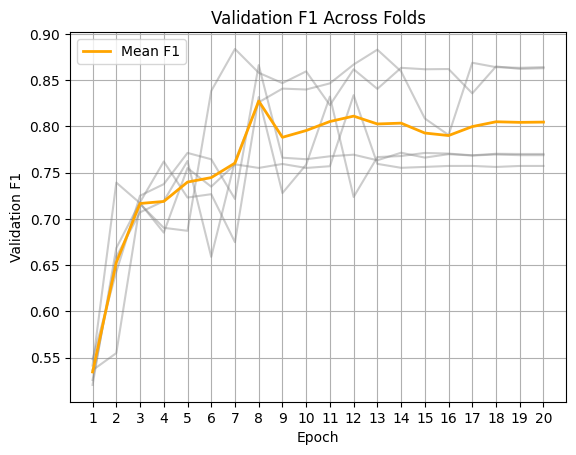

In [6]:
epochs = np.arange(1, EPOCHS + 1)

def interp_to_epochs(arr):
    arr = np.asarray(arr)
    orig_x = np.arange(1, len(arr) + 1)

    if len(arr) == 1:
        return np.full_like(epochs, arr[0], dtype=float)

    return np.interp(epochs, orig_x, arr)

def plot_mean_curves(all_vals, y_label, title, metric_name):
    interp_vals = []

    for v in all_vals:
        v_interp = interp_to_epochs(v)
        interp_vals.append(v_interp)
        plt.plot(epochs, v_interp, color="gray", alpha=0.4)

    interp_vals = np.vstack(interp_vals)
    mean_vals = interp_vals.mean(axis=0)

    plt.plot(epochs, mean_vals, color="orange", linewidth=2, label=f"Mean {metric_name}")
    plt.xlabel("Epoch"); plt.ylabel(y_label); plt.title(title)
    plt.xticks(epochs)
    plt.legend(); plt.grid(True)
    plt.show()

plot_mean_curves(all_val_losses, "Validation Loss", "Validation Loss Across Folds", "Loss")
plot_mean_curves(all_val_accs, "Validation Accuracy", "Validation Accuracy Across Folds", "Accuracy")
plot_mean_curves(all_val_f1s, "Validation F1", "Validation F1 Across Folds", "F1")

## 5. 総合評価


===== Average Across 5 Folds =====
Accuracy : 0.9689
Precision: 0.8082
Recall   : 0.8039
F1       : 0.8047

Per-Class F1 (Macro Average):
  A: 0.9832
  B: 0.8841
  C: 0.9516
  D: 0.2333
  E: 0.9714


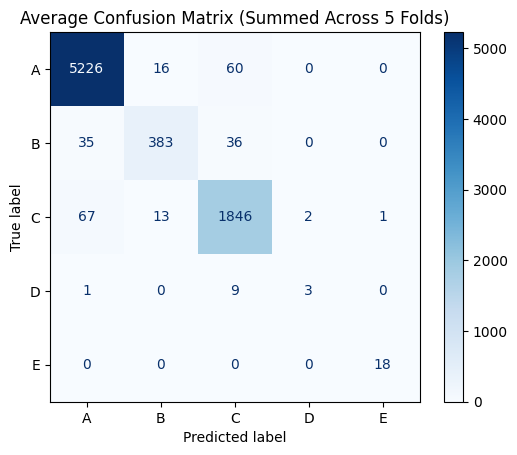

In [7]:
mean_acc = np.mean(all_accs)
mean_pre = np.mean(all_pres)
mean_rec = np.mean(all_recs)
mean_f1 = np.mean(all_f1s)
mean_class_f1 = np.mean(np.array(all_class_f1s), axis=0)

print("\n\033[36m===== Average Across 5 Folds =====\033[0m")
print(f"Accuracy : {mean_acc:.4f}")
print(f"Precision: {mean_pre:.4f}")
print(f"Recall   : {mean_rec:.4f}")
print(f"F1       : {mean_f1:.4f}\n")

print("Per-Class F1 (Macro Average):")
for cls, score in zip(label2id.keys(), mean_class_f1):
    print(f"  {cls}: {score:.4f}")

# ==== 混同行列平均表示 ====
mean_cm = np.sum(all_conf_matrices, axis=0)
disp = ConfusionMatrixDisplay(confusion_matrix=mean_cm, display_labels=list(label2id.keys()))
disp.plot(cmap="Blues")
plt.title("Average Confusion Matrix (Summed Across 5 Folds)")
plt.show()